# Principal Component Analysis

In [1]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io
import time

%matplotlib inline

## Data Visualization

In [2]:
ex7data1 = scipy.io.loadmat('data/ex7data1.mat')
X = ex7data1['X']

In [3]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mean) / std

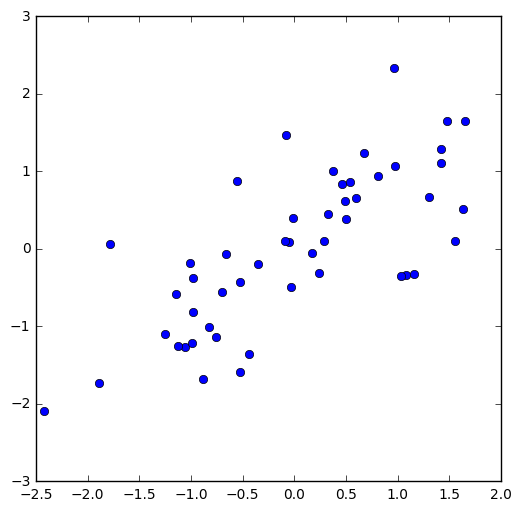

In [4]:
fig = plt.figure(figsize=(6, 6))
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.show()

In [5]:
def PCA(X, K=None, remain_variance=0.99):
    m = np.size(X, axis=0)
    Sigma = (X.T @ X) / m
    U, S, V = np.linalg.svd(Sigma)
    if K is None or K <= 0:
        S_total = np.sum(S)
        K = 0
        S_sum = 0
        while S_sum / S_total < remain_variance:
            S_sum += S[K]
            K += 1
    U_n_K = U[:, :K]
    X_pca = X @ U_n_K
    return X_pca, U_n_K, U, K

In [6]:
X_pca, U_n_K, U, K = PCA(X_norm, 1)
X_approx = X_pca @ U_n_K.T

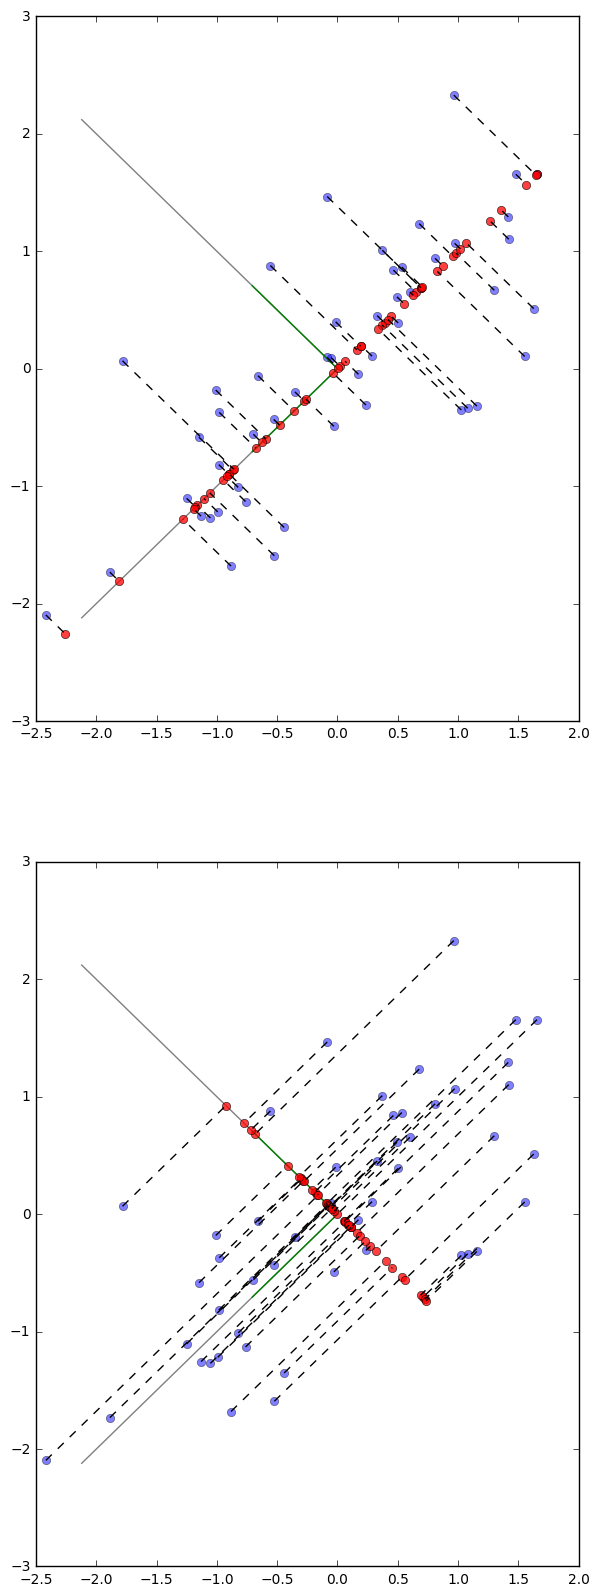

In [7]:
plt.figure(figsize=(7, 20))
plt.subplot(2, 1, 1)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo', alpha=0.5)
plt.plot([0, U[0, 0] * 3], [0, U[1, 0] * 3], 'k', alpha=0.5)
plt.plot([0, U[0, 1] * 3], [0, U[1, 1] * 3], 'k', alpha = 0.5)
plt.plot([0, U[0, 0]], [0, U[1, 0]], 'g')
plt.plot([0, U[0, 1]], [0, U[1, 1]], 'g')
plt.plot(X_approx[:, 0], X_approx[:, 1], 'ro', alpha=0.75)
for i in range(np.size(X_norm, axis=0)):
    plt.plot((X_norm[i, 0], X_approx[i, 0]), (X_norm[i, 1], X_approx[i, 1]), 'k--')
plt.subplot(2, 1, 2)
X_pca_2 = X_norm @ U[:, 1:2]
X_approx_2 = X_pca_2 @ U[:, 1:2].T
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo', alpha=0.5)
plt.plot([0, U[0, 0] * 3], [0, U[1, 0] * 3], 'k', alpha=0.5)
plt.plot([0, U[0, 1] * 3], [0, U[1, 1] * 3], 'k', alpha = 0.5)
plt.plot([0, U[0, 0]], [0, U[1, 0]], 'g')
plt.plot([0, U[0, 1]], [0, U[1, 1]], 'g')
plt.plot(X_approx_2[:, 0], X_approx_2[:, 1], 'ro', alpha=0.75)
for i in range(np.size(X_norm, axis=0)):
    plt.plot((X_norm[i, 0], X_approx_2[i, 0]), (X_norm[i, 1], X_approx_2[i, 1]), 'k--')
plt.show()

## Face Image Data

In [8]:
ex7faces = scipy.io.loadmat('data/ex7faces.mat')
X = ex7faces['X']

In [9]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mean) /std

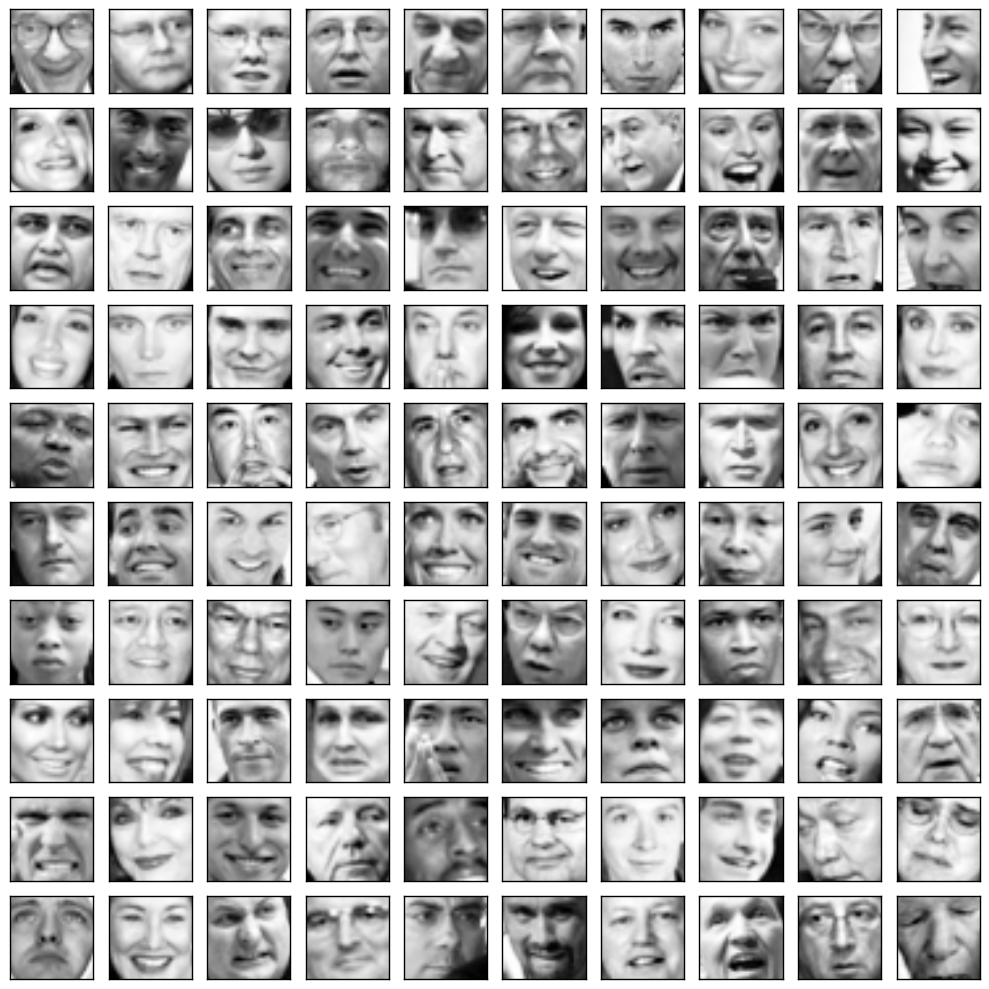

In [10]:
plt.figure(figsize=(10, 10))
width = 10
height = 10
for i in range(width * height):
    img = X[i].reshape(32, 32).T
    subplot = plt.subplot(width, height, i + 1)
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
    plt.imshow(img, cmap='Greys_r')
plt.tight_layout()
plt.show()

In [11]:
X_pca, U_n_K, U, K = PCA(X_norm, K=100)
X_approx = X_pca @ U_n_K.T
print('Finished PCA calculation.')

Finished PCA calculation.


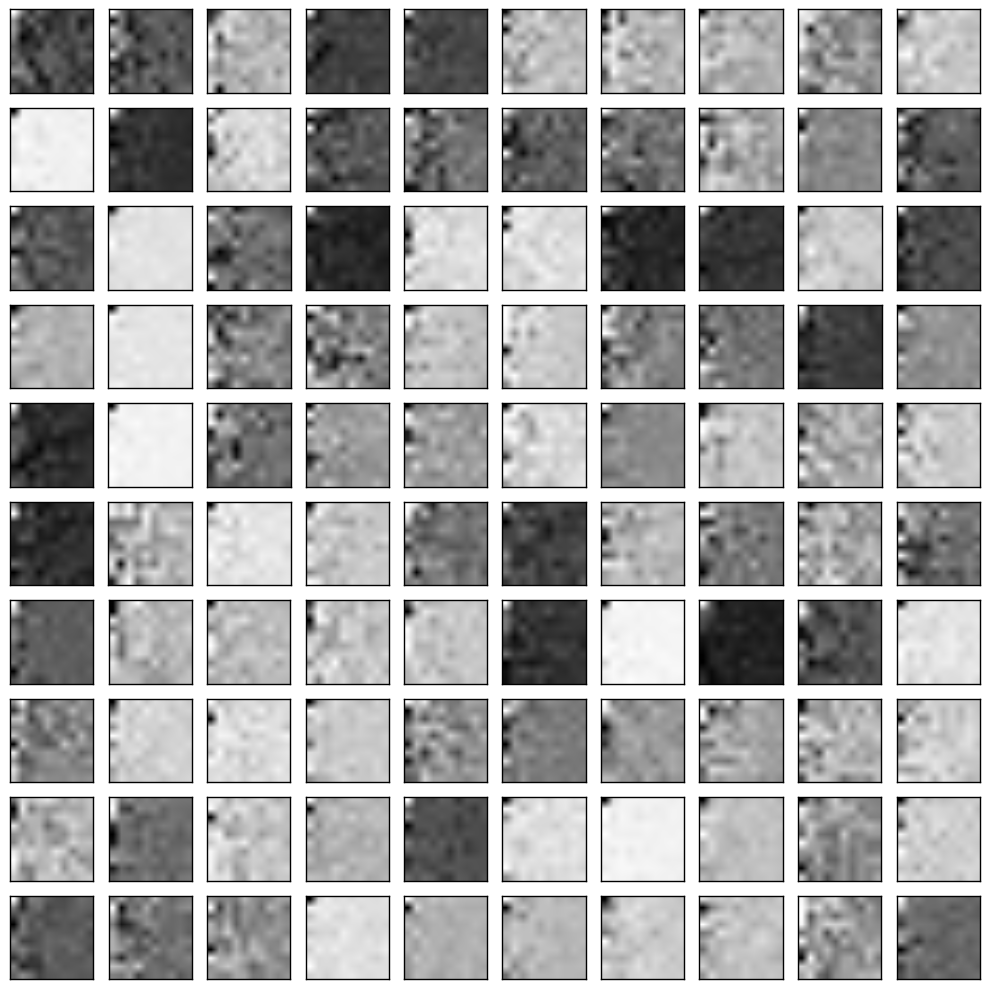

In [12]:
plt.figure(figsize=(10, 10))
width = 10
height = 10
for i in range(width * height):
    img = X_pca[i].reshape(10, 10).T
    subplot = plt.subplot(width, height, i + 1)
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
    plt.imshow(img, cmap='Greys_r')
plt.tight_layout()
plt.show()

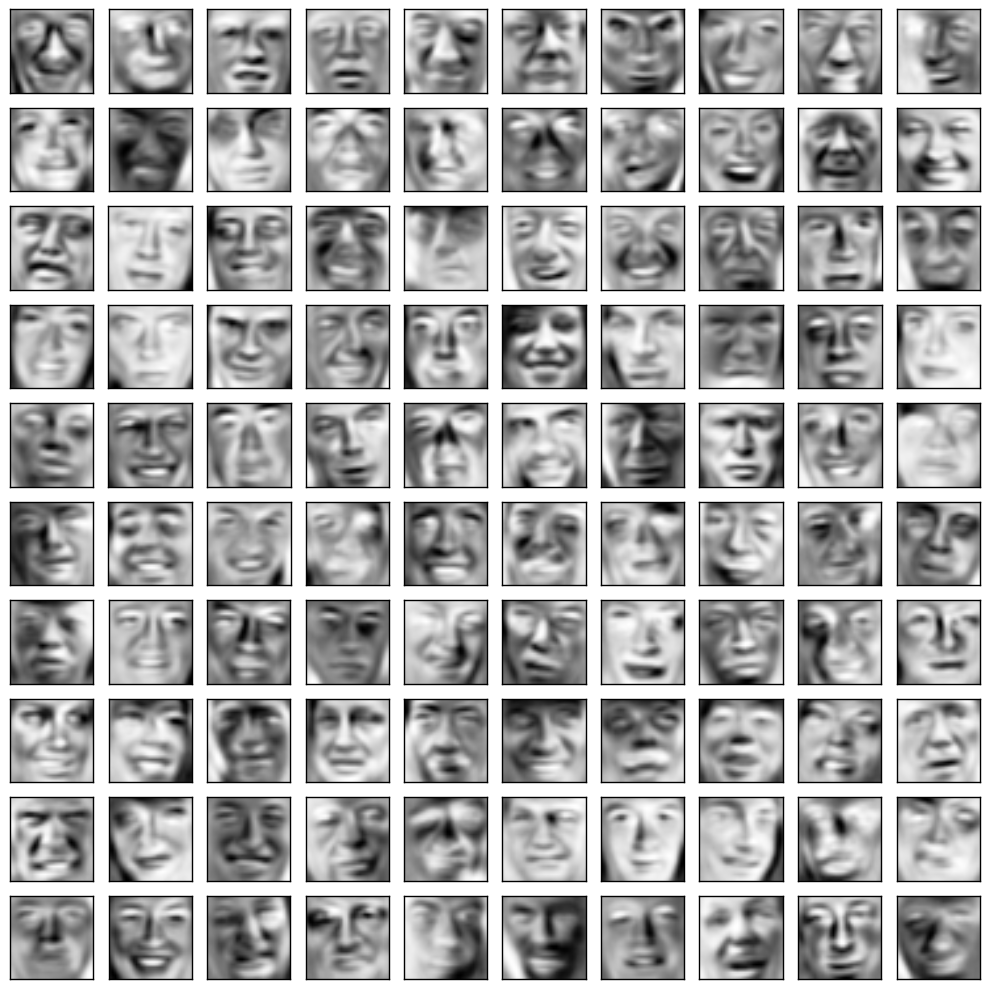

In [13]:
plt.figure(figsize=(10, 10))
width = 10
height = 10
for i in range(width * height):
    img = X_approx[i].reshape(32, 32).T
    subplot = plt.subplot(width, height, i + 1)
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
    plt.imshow(img, cmap='Greys_r')
plt.tight_layout()
plt.show()

In [16]:
X_pca, U_n_K, U, K = PCA(X_norm, K=None, remain_variance=0.99)
X_approx = X_pca @ U_n_K.T
print('Finished PCA calculation.')
print('Need {0} principal components to remain 99% of the variance'.format(K))

Finished PCA calculation.
Need 335 principal components to remain 99% of the variance


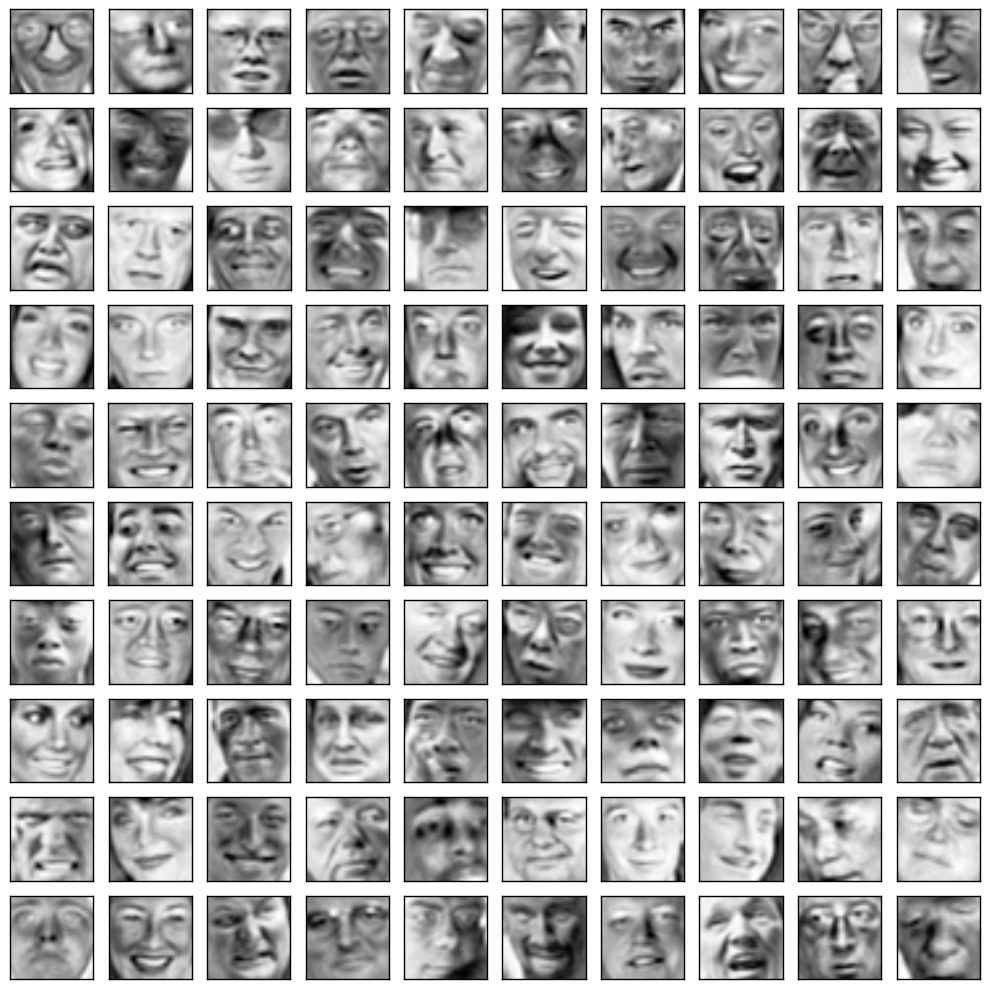

In [17]:
plt.figure(figsize=(10, 10))
width = 10
height = 10
for i in range(width * height):
    img = X_approx[i].reshape(32, 32).T
    subplot = plt.subplot(width, height, i + 1)
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
    plt.imshow(img, cmap='Greys_r')
plt.tight_layout()
plt.show()